# Processing words from Shakespeare's 

In [2]:

from Uint128 import Uint128
from BinarySearchTree import BSTree
from HashMD5 import HashMD5
import os


In [3]:
Hash = HashMD5()

### Store all words into a list

In [4]:
list_of_words = []
folder = "./Shakespeare/"
for filename in os.listdir(folder):
    with open(folder + filename, 'r') as f:
        for line in f:
            for word in line.split():
                list_of_words.append(word)

### Hash Table to keep track of hash values and lists to keep track of words and collisions

In [5]:
hash_dict = {}
collisions = []
unique_words = []


### Store hashed values into trees and hash table, look for collisions after

In [6]:
tree = BSTree()
for word in list_of_words:
    hash_value = Hash.hash(word)
    # Hashmap with list of words for each hash value
    if hash_value in hash_dict and word not in hash_dict[hash_value]:
        hash_dict[hash_value].append(word)
    else:
        hash_dict[hash_value] = [word]
    # True if inserted, False if already in tree
    if (tree.insert(Uint128(hash_value))):
        unique_words.append(word)
for value in hash_dict.values():
    if len(value) > 1:
        collisions.append(value)
    
    

### Unique words found

In [7]:
len(unique_words)

23086

### Collisions found

In [8]:
len(collisions)

0

### Get list of words in ascending order

In [9]:
# Best case scenario, all words sorted in order
list_words_sorted = tree.inorderTraversal()
# Reverse the list to test the other way around
# list_words_sorted = list_words_sorted[ :: -1]


### All the test functions

In [10]:
from MinHeapArray import MinHeapArray
from MinHeapTree import MinHeapTree
from BinomialHeap import BinomialHeap
import timeit

In [11]:
def extract_min_test():
    min_heap_array = MinHeapArray()
    min_heap_tree = MinHeapTree()
    binomial_heap = BinomialHeap()
    
    # Insert all words into heaps
    min_heap_array.createMinHeap(list_words_sorted)
    min_heap_tree.createMinHeap(list_words_sorted)
    binomial_heap.createBinomialHeap(list_words_sorted)
    
    # Time the operation
    exec_time = []
    exec_time.append(
        timeit.timeit(lambda: min_heap_array.extractMin(), number=1000))
    exec_time.append(
        timeit.timeit(lambda: min_heap_tree.extractMin(), number=1000))
    exec_time.append(
        timeit.timeit(lambda: binomial_heap.extractMin(), number=1000))
    
    return exec_time

In [12]:
def insert_test():
    min_heap_array = MinHeapArray()
    min_heap_tree = MinHeapTree()
    binomial_heap = BinomialHeap()
    
    # Insert all words into heaps
    min_heap_array.createMinHeap(list_words_sorted[1:])
    min_heap_tree.createMinHeap(list_words_sorted[1:])
    binomial_heap.createBinomialHeap(list_words_sorted[1:])
    
    # Time the operation
    exec_time = []
    exec_time.append(
        timeit.timeit(lambda: min_heap_array.insertKey(list_words_sorted[0]), number=100000))
    exec_time.append(
        timeit.timeit(lambda: min_heap_tree.insertKey(list_words_sorted[0]), number=100000))
    exec_time.append(
        timeit.timeit(lambda: binomial_heap.insertKey(list_words_sorted[0]), number=100000))
    
    return exec_time

In [13]:
def construction_test():
    min_heap_array = MinHeapArray()
    min_heap_tree = MinHeapTree()
    binomial_heap = BinomialHeap()
    
    # Time the  operation
    exec_time = []
    exec_time.append(
        timeit.timeit(lambda: min_heap_array.createMinHeap(list_words_sorted), number=10))
    exec_time.append(
        timeit.timeit(lambda: min_heap_tree.createMinHeap(list_words_sorted), number=10))
    exec_time.append(
        timeit.timeit(lambda: binomial_heap.createBinomialHeap(list_words_sorted), number=10))
    
    return exec_time

In [14]:
def union_test():
    min_heap_array1 = MinHeapArray()
    min_heap_tree1 = MinHeapTree()
    binomial_heap1 = BinomialHeap()
    
    # Insert all words into heaps
    min_heap_array1.createMinHeap(list_words_sorted[:len(list_words_sorted)//2])
    min_heap_tree1.createMinHeap(list_words_sorted[:len(list_words_sorted)//2])
    binomial_heap1.createBinomialHeap(
        list_words_sorted[:len(list_words_sorted)//2])
    
    min_heap_array2 = MinHeapArray()
    min_heap_tree2 = MinHeapTree()
    binomial_heap2 = BinomialHeap()
    
    min_heap_array2.createMinHeap(
        list_words_sorted[len(list_words_sorted)//2:])
    min_heap_tree2.createMinHeap(list_words_sorted[len(list_words_sorted)//2:])
    binomial_heap2.createBinomialHeap(
        list_words_sorted[len(list_words_sorted)//2:])

    

    # Time the  operation
    exec_time = []
    exec_time.append(
        timeit.timeit(lambda: min_heap_array1.union(min_heap_array2), number=10))
    exec_time.append(
        timeit.timeit(lambda: min_heap_tree1.union(min_heap_tree2), number=10))
    exec_time.append(
        timeit.timeit(lambda: binomial_heap1.mergeHeap(binomial_heap2), number=10))
    
    return exec_time

## Results

In [15]:
list_data_structures = ["MinHeapArray", "MinHeapTree", "BinomialHeap"]
extract_min_time = extract_min_test()
insert_time = insert_test()
construction_time = construction_test()
union_time = union_test()

In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

### Extraction of Min (Best Case scenario for BinomialHeap because min is inserted first)

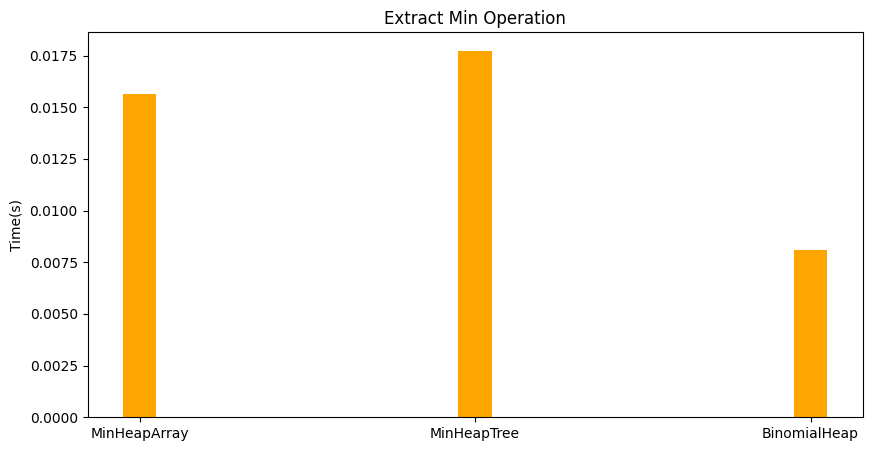

In [17]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(list_data_structures, extract_min_time, color='orange',
        width=0.1)

plt.ylabel("Time(s)")
plt.title("Extract Min Operation")
plt.show()


### Insertion

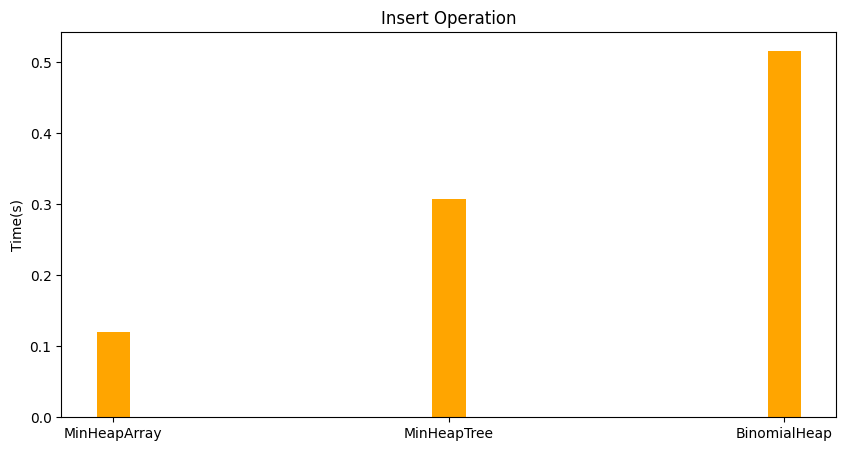

In [18]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(list_data_structures, insert_time, color='orange',
        width=0.1)


plt.ylabel("Time(s)")
plt.title("Insert Operation")
plt.show()


### Construction

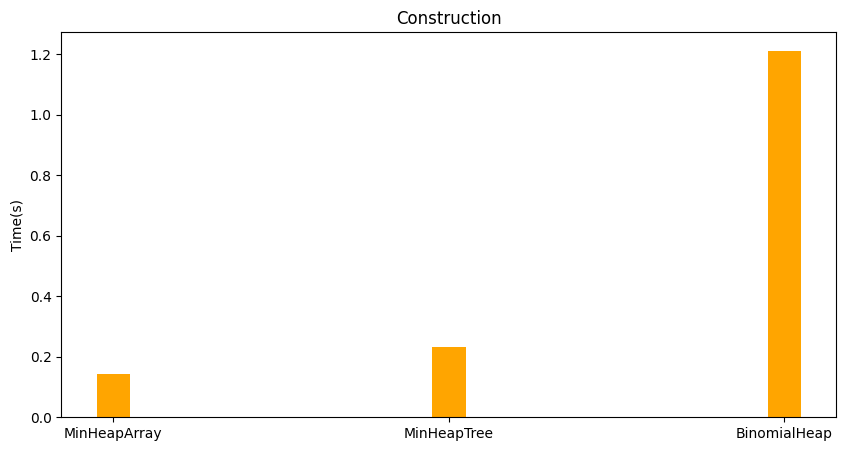

In [19]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(list_data_structures, construction_time, color='orange',
        width=0.1)


plt.ylabel("Time(s)")
plt.title("Construction")
plt.show()


Merge

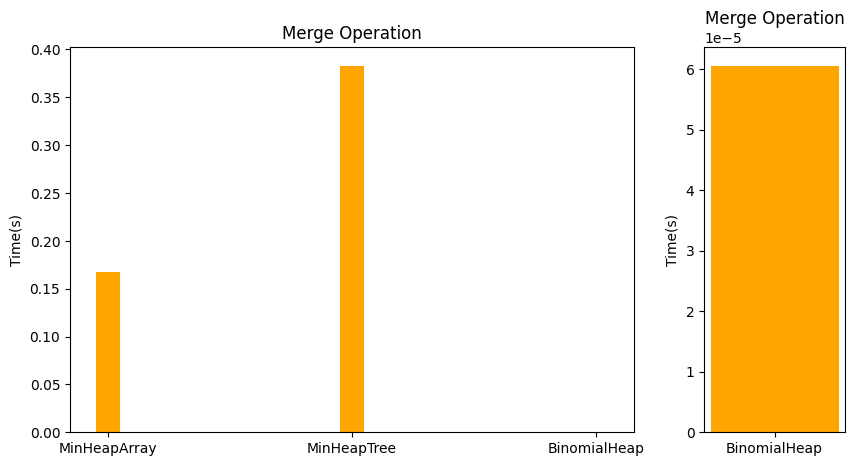

In [20]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot

gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.subplot(1,2,1)
plt.title("Merge Operation")
plt.ylabel("Time(s)")
ax0.bar (list_data_structures, union_time, color='orange',width=0.1)
plt.subplot(1,2,2)
ax1.bar (list_data_structures[-1], union_time[-1], color='orange',width=0.1)
plt.ylabel("Time(s)")
plt.title("Merge Operation")
plt.show()
